In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.spatial.distance import pdist, squareform
from scipy import stats

data = pd.read_csv("SegmentationData.csv")
data.head()

,ID,Trendy,Styling,Reliability,Sportiness,Performance,Comfort,MBA,Choice
0,1,10,20,35,5,20,10,MBA,Lexus
1,2,25,5,25,5,25,15,MBA,BMW
2,3,10,20,30,10,10,20,MBA,Lexus
3,4,10,15,30,10,20,15,MBA,BMW
4,5,20,10,40,1,14,15,MBA,Mercedes


In [2]:
# Se reemplaza el index de pandas por el ID de la tabla y se eliminan las columnas con valores de caracteres
data_copia = data[['Trendy', 'Styling', 'Reliability', 'Sportiness', 'Performance', 'Comfort']]
data_copia.head()

,Trendy,Styling,Reliability,Sportiness,Performance,Comfort
0,10,20,35,5,20,10
1,25,5,25,5,25,15
2,10,20,30,10,10,20
3,10,15,30,10,20,15
4,20,10,40,1,14,15


In [3]:
# Estandarizacion de campos
scaler = StandardScaler()
data_estand = scaler.fit_transform(data_copia)
data_estand = pd.DataFrame(data_estand, columns = data_copia.columns)
data_estand.head()

,Trendy,Styling,Reliability,Sportiness,Performance,Comfort
0,-0.689164,0.499143,1.777941,-1.171735,0.086045,-1.114841
1,1.448611,-1.930019,0.357922,-1.171735,0.833813,-0.084671
2,-0.689164,0.499143,1.067932,-0.184014,-1.409493,0.945498
3,-0.689164,-0.310578,1.067932,-0.184014,0.086045,-0.084671
4,0.736019,-1.120299,2.487950,-1.961912,-0.811278,-0.084671


In [4]:
# Se calculan las distancias euclidanas entre campos
dist_eucli = pdist(data_estand)
dist_eucli

array([3.75603137, 2.82158388, 1.78790465, ..., 2.81839803, 3.56030937,
       3.80538542])

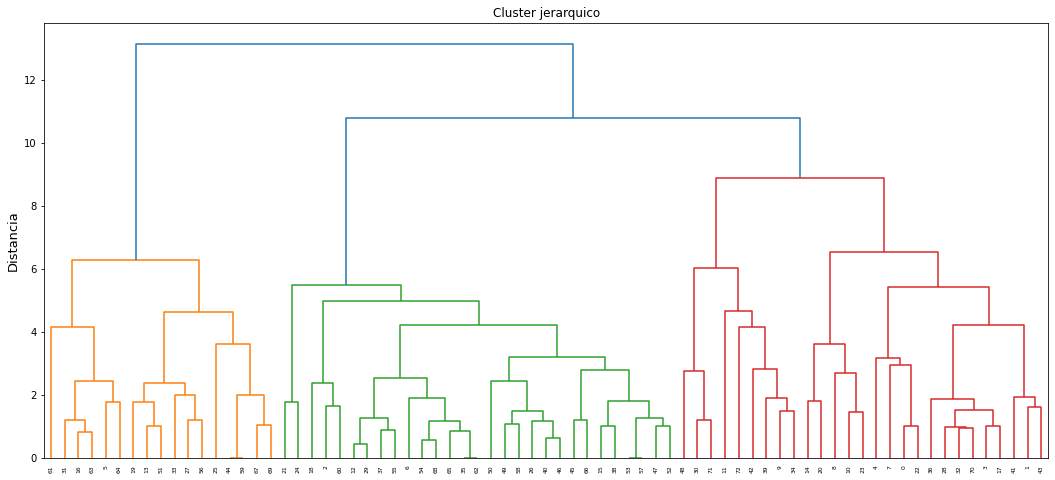

In [5]:
# Seleccion de criterio ward
link = linkage(data_estand, "ward")
# Dendrograma
plt.figure(figsize=(18,8))
dendrograma = dendrogram(link)
plt.title("Cluster jerarquico")
plt.ylabel("Distancia", fontsize = 13)
plt.show()

In [6]:
# Se realiza corte en 7 para que haya 4 cluster (k=4)
labels = fcluster(link, 7, criterion="distance")
print(labels)

[4 4 2 4 4 1 2 4 4 3 4 3 2 1 4 2 1 4 2 1 4 2 4 4 2 1 2 1 4 2 3 1 4 1 3 2 4
 2 2 3 2 4 3 4 1 2 2 2 3 2 2 1 2 2 2 2 1 2 2 1 2 1 2 1 1 2 2 1 2 1 4 3 3]


In [7]:
# Se agrega la nueva columna al dataset
data_estand["Cluster"] = labels
data_estand

,Trendy,Styling,Reliability,Sportiness,Performance,Comfort,Cluster
0,-0.689164,0.499143,1.777941,-1.171735,0.086045,-1.114841,4
1,1.448611,-1.930019,0.357922,-1.171735,0.833813,-0.084671,4
2,-0.689164,0.499143,1.067932,-0.184014,-1.409493,0.945498,2
3,-0.689164,-0.310578,1.067932,-0.184014,0.086045,-0.084671,4
4,0.736019,-1.120299,2.487950,-1.961912,-0.811278,-0.084671,4
...,...,...,...,...,...,...,...
68,0.450983,0.175255,-0.494089,0.803707,-0.362617,-0.496739,2
69,0.736019,1.308864,-1.062096,-0.184014,-0.661724,-0.084671,1
70,0.023428,-0.310578,-0.352087,-0.184014,0.833813,-0.084671,4
71,-0.689164,2.118585,-0.352087,-1.171735,0.086045,-0.084671,3


In [8]:
# Se agrupa por cluster para visualizar las caracteristicas
dataAgrupado = data_estand.groupby("Cluster").mean()
dataAgrupado

,Trendy,Styling,Reliability,Sportiness,Performance,Comfort
Cluster,,,,,,
1,1.155191,0.861136,-0.661150,0.164594,-0.925642,-0.702773
2,-0.015888,-0.427848,-0.283534,0.503985,-0.099608,0.590267
3,-1.116719,1.128926,-0.052305,-0.030368,0.750728,-0.748559
4,-0.507057,-0.688448,1.107377,-0.952241,0.659334,0.087023


In [9]:
# Se crea diccionario de caracteristicas de cluster
cluster = {
    1: "Deportivos populares",
    2: "Deportivos cómodos",
    3: "Rendidores con estilo",
    4: "Confiables con buen rendimiento"
}
data_estand["NombreCluster"] = data_estand["Cluster"].apply(lambda x: cluster[x])
data_estand

,Trendy,Styling,Reliability,Sportiness,Performance,Comfort,Cluster,NombreCluster
0,-0.689164,0.499143,1.777941,-1.171735,0.086045,-1.114841,4,Confiables con buen rendimiento
1,1.448611,-1.930019,0.357922,-1.171735,0.833813,-0.084671,4,Confiables con buen rendimiento
2,-0.689164,0.499143,1.067932,-0.184014,-1.409493,0.945498,2,Deportivos cómodos
3,-0.689164,-0.310578,1.067932,-0.184014,0.086045,-0.084671,4,Confiables con buen rendimiento
4,0.736019,-1.120299,2.487950,-1.961912,-0.811278,-0.084671,4,Confiables con buen rendimiento
...,...,...,...,...,...,...,...,...
68,0.450983,0.175255,-0.494089,0.803707,-0.362617,-0.496739,2,Deportivos cómodos
69,0.736019,1.308864,-1.062096,-0.184014,-0.661724,-0.084671,1,Deportivos populares
70,0.023428,-0.310578,-0.352087,-0.184014,0.833813,-0.084671,4,Confiables con buen rendimiento
71,-0.689164,2.118585,-0.352087,-1.171735,0.086045,-0.084671,3,Rendidores con estilo


In [10]:
# Se elimina la fila que posee el ID del cluster
del data_estand["Cluster"]
data_estand

,Trendy,Styling,Reliability,Sportiness,Performance,Comfort,NombreCluster
0,-0.689164,0.499143,1.777941,-1.171735,0.086045,-1.114841,Confiables con buen rendimiento
1,1.448611,-1.930019,0.357922,-1.171735,0.833813,-0.084671,Confiables con buen rendimiento
2,-0.689164,0.499143,1.067932,-0.184014,-1.409493,0.945498,Deportivos cómodos
3,-0.689164,-0.310578,1.067932,-0.184014,0.086045,-0.084671,Confiables con buen rendimiento
4,0.736019,-1.120299,2.487950,-1.961912,-0.811278,-0.084671,Confiables con buen rendimiento
...,...,...,...,...,...,...,...
68,0.450983,0.175255,-0.494089,0.803707,-0.362617,-0.496739,Deportivos cómodos
69,0.736019,1.308864,-1.062096,-0.184014,-0.661724,-0.084671,Deportivos populares
70,0.023428,-0.310578,-0.352087,-0.184014,0.833813,-0.084671,Confiables con buen rendimiento
71,-0.689164,2.118585,-0.352087,-1.171735,0.086045,-0.084671,Rendidores con estilo


In [11]:
# Se realiza crosstab entre el cluster y los que poseen MBA
pd.crosstab(data["MBA"], data_estand["NombreCluster"], margins=True, normalize="index")

NombreCluster,Confiables con buen rendimiento,Deportivos cómodos,Deportivos populares,Rendidores con estilo
MBA,,,,
MBA,0.500000,0.250000,0.166667,0.083333
Undergrad,0.122449,0.469388,0.265306,0.142857
All,0.246575,0.397260,0.232877,0.123288


In [12]:
pd.crosstab(data["MBA"], data_estand["NombreCluster"], margins=True)

NombreCluster,Confiables con buen rendimiento,Deportivos cómodos,Deportivos populares,Rendidores con estilo,All
MBA,,,,,
MBA,12,6,4,2,24
Undergrad,6,23,13,7,49
All,18,29,17,9,73


In [13]:
pd.crosstab(data["Choice"], data_estand["NombreCluster"], margins=True, normalize="index")

NombreCluster,Confiables con buen rendimiento,Deportivos cómodos,Deportivos populares,Rendidores con estilo
Choice,,,,
BMW,0.250000,0.312500,0.250000,0.187500
Lexus,0.409091,0.363636,0.227273,0.000000
Mercedes,0.052632,0.578947,0.210526,0.157895
All,0.246575,0.397260,0.232877,0.123288


In [14]:
pd.crosstab(data["Choice"], data_estand["NombreCluster"], margins=True)

NombreCluster,Confiables con buen rendimiento,Deportivos cómodos,Deportivos populares,Rendidores con estilo,All
Choice,,,,,
BMW,8,10,8,6,32
Lexus,9,8,5,0,22
Mercedes,1,11,4,3,19
All,18,29,17,9,73


In [15]:
# Test de chicuadrado para evaluar si existe correlacion
tabla = pd.crosstab(data["MBA"], data_estand["NombreCluster"], margins=True)
f_obs = np.array([tabla.iloc[0][0:3].values, tabla.iloc[1][0:3].values])
f_obs

array([[12,  6,  4],
       [ 6, 23, 13]], dtype=int64)

In [16]:
stats.chi2_contingency(f_obs)[0:3]

(11.614446405521456, 0.0030057648945757422, 2)

In [17]:
tabla2 = pd.crosstab(data["Choice"], data_estand["NombreCluster"], margins=True)
f_obs2 = np.array([tabla2.iloc[0][0:3].values, tabla2.iloc[1][0:3].values])
f_obs2

array([[ 8, 10,  8],
       [ 9,  8,  5]], dtype=int64)

In [18]:
stats.chi2_contingency(f_obs2)[0:3]

(0.6444957757174951, 0.7245185687111928, 2)